In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [59]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [60]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<Axes: xlabel='R&D Spend', ylabel='Profit'>

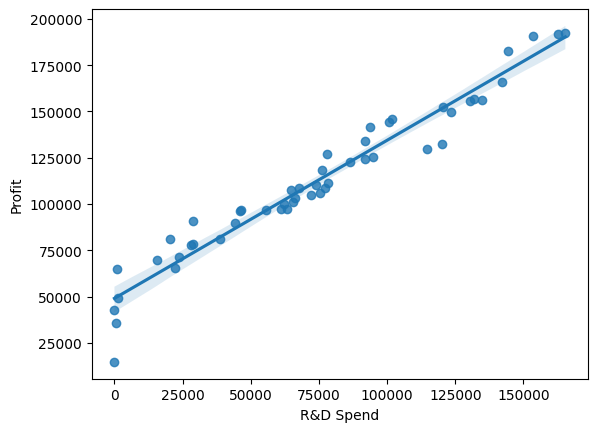

In [61]:
sns.regplot(df,x='R&D Spend', y='Profit')

<Axes: xlabel='Administration', ylabel='Profit'>

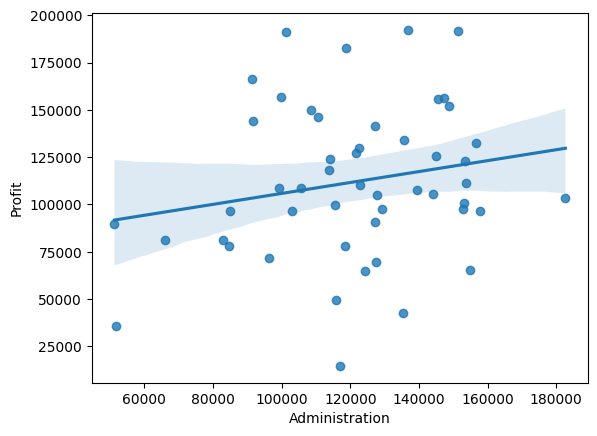

In [62]:
sns.regplot(df,x='Administration', y='Profit')

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

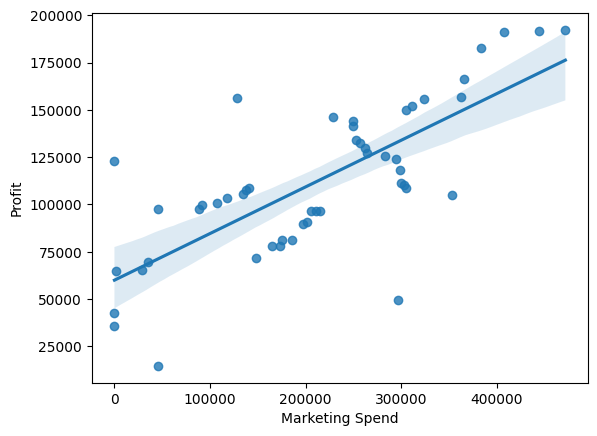

In [63]:
sns.regplot(df,x='Marketing Spend', y='Profit')

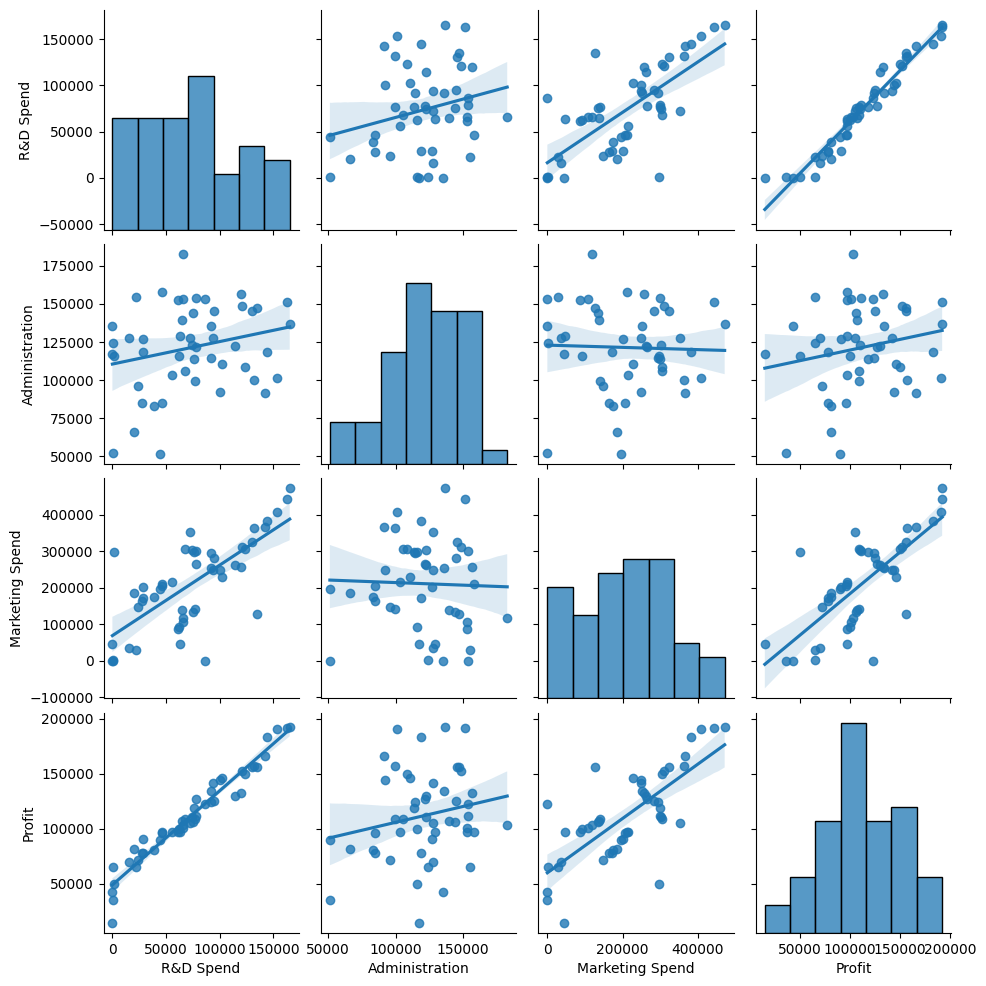

In [64]:
sns.pairplot(df, kind='reg')

<Axes: xlabel='State', ylabel='Profit'>

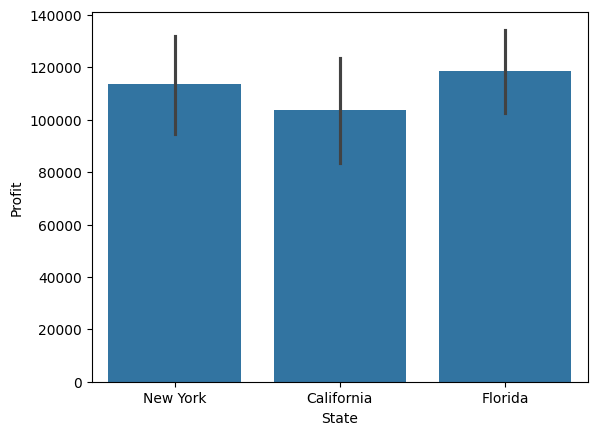

In [65]:
sns.barplot(df, x='State', y='Profit')

In [66]:
x = df.drop(columns=['Profit']) 
y = df['Profit']

In [67]:
print(x)

    R&D Spend  Administration  Marketing Spend       State
0   165349.20       136897.80        471784.10    New York
1   162597.70       151377.59        443898.53  California
2   153441.51       101145.55        407934.54     Florida
3   144372.41       118671.85        383199.62    New York
4   142107.34        91391.77        366168.42     Florida
5   131876.90        99814.71        362861.36    New York
6   134615.46       147198.87        127716.82  California
7   130298.13       145530.06        323876.68     Florida
8   120542.52       148718.95        311613.29    New York
9   123334.88       108679.17        304981.62  California
10  101913.08       110594.11        229160.95     Florida
11  100671.96        91790.61        249744.55  California
12   93863.75       127320.38        249839.44     Florida
13   91992.39       135495.07        252664.93  California
14  119943.24       156547.42        256512.92     Florida
15  114523.61       122616.84        261776.23    New Yo

In [68]:
print(y)

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64


In [69]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [70]:
cat_cols = x.select_dtypes(include=['object']).columns
num_cols = x.select_dtypes(exclude=['object']).columns

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 

Pipeline


In [72]:
cat_pipe = Pipeline(
    steps=[
        ('encoder', OneHotEncoder(drop='first'))
    ]
)

In [73]:
num_pipe = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
    ]
)

In [74]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_pipe, cat_cols),
    ('num', num_pipe, num_cols)
] )

In [78]:
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('lr', LinearRegression())
    ]
)

In [79]:
model.fit(Xtrain, ytrain)

,steps,"[('preprocessor', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
